<a href="https://colab.research.google.com/github/Eyabennessib/Machine-Learning/blob/main/TP4_Segmentation_images_microscopiques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# TP 4 Segmentation d’images microscopiques 
### Eya BEN NESSIB

*Ce TP a pour objectif de segmenter des images microscopiques par le biais de l’algorithme 
d’apprentissage « RandomForestRegressor ».*

### Extraction des attributs et préparation du jeu de données

In [ ]:
import numpy as np 
import cv2 
import pandas as pd

In [ ]:
Img = cv2.imread("Train_images/Sandstone_Versa0000.tif")

In [ ]:
Img.shape

(1024, 996, 3)

In [ ]:
Img = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)

In [ ]:
Img2 = Img.reshape(-1) # 1D 

In [ ]:
df = pd.DataFrame() #construire une base de donnée de type dataframe avec la bibliothèque pandas
df['Original Imag'] = Img2 #affecter les données de l'image à la base de données
print(df.head) #visualiser une partie des données

<bound method NDFrame.head of          Original Imag
0                    0
1                    0
2                    0
3                    0
4                    0
...                ...
1019899              0
1019900              0
1019901              0
1019902              0
1019903              0

[1019904 rows x 1 columns]>


In [ ]:
num = 1 
kernels = [] 
#fixation des paramètres du filtre
for theta in range(2): 
    theta = theta / 4. * np.pi 
    for sigma in (1, 3): 
        for lamda in np.arange(0, np.pi, np.pi / 4): 
            for gamma in (0.05, 0.5): 
             gabor_label = 'Gabor' + str(num) 
             print(gabor_label) 
             ksize=9 #définir la taile du kernel (9,9)
             kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta,lamda, gamma, 0, ktype=cv2.CV_32F) 
             #déclarer le filtre gabor au variable kernel
             kernels.append(kernel) #remplir la liste par les valeurs du filtre
             fimg = cv2.filter2D(Img2, cv2.CV_8UC3, kernel) #appliquer le filtre sur l'image
             filtered_img = fimg.reshape(-1) #transformer l'image filtrée en un signal 1D
             df[gabor_label] = filtered_img #créer et affecter les valeurs de l'image filtrée à la colonne gabor_laber dans la base des données
             print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma) 
             num += 1

Gabor1
Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14
Gabor14 : th

In [ ]:
#des filtres de detection des contours
edges = cv2.Canny(Img, 100,200) #appliquer le filtre sur l'image
# 200 s’agit de la valeur seuil élevée du gradient.
# 100 s’agit de la valeur seuil faible du gradient.
edges1 = edges.reshape(-1) #transfomer l'image en 1 signal 1D
df['Canny Edge'] = edges1 #afecter les valeurs des attributs à la base des données dans la colonne Canny Edge

from skimage.filters import roberts, sobel, scharr, prewitt 

edge_roberts = roberts(Img) #appliquer le filtre sur l'image
edge_roberts1 = edge_roberts.reshape(-1) #transfomer l'image en 1 signal 1D
df['Roberts'] = edge_roberts1  #afecter les valeurs des attributs à la base des données

edge_sobel = sobel(Img) #appliquer le filtre sur l'image
edge_sobel1 = edge_sobel.reshape(-1) #transfomer l'image en 1 signal 1D
df['Sobel'] = edge_sobel1  #afecter les valeurs des attributs à la base des données 

edge_scharr = scharr(Img) #appliquer le filtre sur l'image
edge_scharr1 = edge_scharr.reshape(-1) #transfomer l'image en 1 signal 1D
df['Scharr'] = edge_scharr1  #afecter les valeurs des attributs à la base des données

edge_prewitt = prewitt(Img) #appliquer le filtre sur l'image
edge_prewitt1 = edge_prewitt.reshape(-1) #transfomer l'image en 1 signal 1D
df['Prewitt'] = edge_prewitt1  #afecter les valeurs des attributs à la base des données

from scipy import ndimage as nd 

gaussian_img = nd.gaussian_filter(Img, sigma=3) #appliquer le filtre sur l'image
gaussian_img1 = gaussian_img.reshape(-1) #transfomer l'image en 1 signal 1D
df['Gaussian s3'] = gaussian_img1  #afecter les valeurs des attributs à la base des données
gaussian_img2 = nd.gaussian_filter(Img, sigma=7) #appliquer le filtre sur l'image
gaussian_img3 = gaussian_img2.reshape(-1) #transfomer l'image en 1 signal 1D
df['Gaussian s7'] = gaussian_img3  #afecter les valeurs des attributs à la base des données

median_img = nd.median_filter(Img, size=3) #appliquer le filtre sur l'image
median_img1 = median_img.reshape(-1) #transfomer l'image en 1 signal 1D
df['Median s3'] = median_img1  #afecter les valeurs des attributs à la base des données

In [ ]:
labeled_img = cv2.imread("C:/Users/Eyq/OneDrive/Desktop/ML/Train_masks/Sandstone_Versa0000.tif") #lire l'image

In [ ]:
labeled_img.shape

(1024, 996, 3)

In [ ]:
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2GRAY) #transormer l'image en niveau de gris
labeled_img1 = labeled_img.reshape(-1) #transfomer l'image en 1 signal 1D
df['Labels'] = labeled_img1 #afecter les labels à la base des données

### Entrainement du modèle 


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df['Labels']

In [ ]:
X = df.drop(labels = ["Labels"], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [ ]:
model.fit(X_train, y_train) 

RandomForestClassifier(random_state=42)

In [ ]:
model.predict(X_test)

array([29, 29, 29, ..., 76, 76, 29], dtype=uint8)

In [ ]:
from sklearn import metrics

In [ ]:
model.score(X_train,y_train)

1.0

In [ ]:
model.score(X_test,y_test)

0.9831030189946193

on constate que le modèle est stable et précis avec un score de 0,98 ;

In [ ]:
features_list = list(X.columns)  
features_imp = pd.Series(model.feature_importances_, index = features_list).sort_values(ascending=False) 
print(features_imp)

Gabor4           1.235443e-01
Gaussian s3      1.053255e-01
Gabor6           1.020367e-01
Median s3        9.482956e-02
Gabor8           9.376081e-02
Gabor5           6.371189e-02
Gabor7           6.271700e-02
Gabor12          5.690750e-02
Gabor24          5.157029e-02
Original Imag    4.299164e-02
Gabor23          3.467396e-02
Gaussian s7      3.304312e-02
Gabor22          1.934675e-02
Gabor21          1.741603e-02
Gabor30          1.678781e-02
Gabor11          1.652334e-02
Gabor31          1.030941e-02
Gabor29          9.870432e-03
Prewitt          9.608970e-03
Gabor3           8.305730e-03
Scharr           8.200408e-03
Sobel            8.068300e-03
Roberts          6.160673e-03
Gabor32          3.028239e-03
Canny Edge       1.125030e-03
Gabor20          1.123553e-04
Gabor28          2.344694e-05
Gabor27          7.827402e-07
Gabor19          4.607592e-08
Gabor2           0.000000e+00
Gabor10          0.000000e+00
Gabor26          0.000000e+00
Gabor1           0.000000e+00
Gabor18   

les attributs améliore la performance du modèle. En ajoutant à chaque fois des images filtrées par les filtres de detection des contours, ceci améliore la prédiction du modèle à ségmenter l'image;

### Sauvegarde du modèle 

In [ ]:
import pickle #importer la bibliothèque pour enregistrer le modèle.
filename = "sandstone_model" #nommer le disque du modèle.
pickle.dump(model, open(filename, 'wb')) #sauvgarder le modèle dans le disque.

### Test du modèle sur de nouvelles données

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X)

In [ ]:
segmented = result.reshape((Img.shape))

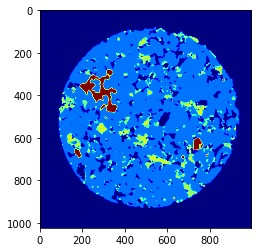

In [ ]:
from matplotlib import pyplot as plt 
plt.imshow(segmented, cmap ='jet') 
plt.imsave('segmented_rock_RF_100_estim.jpg', segmented, cmap ='jet') 

En comparant avec l'image en train mask, je constate que la ségmentation des parties sur l'image est bien faite par le modèle et on retrouve la même image; 